In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('file:///C:/Users/taher/Desktop/spam_ham_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5171.0,2585.000000,1492.883452,0.0,1292.5,2585.0,3877.5,5170.0
label_num,5171.0,0.289886,0.453753,0.0,0.0,0.0,1.0,1.0


In [5]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

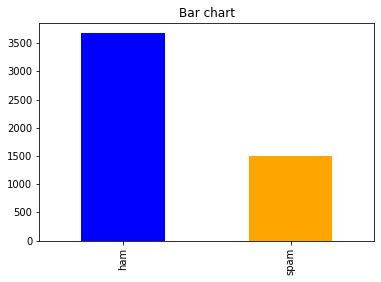

In [7]:
count_Class=pd.value_counts(df['label'], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [8]:
X,y = df.text, df.label

In [9]:
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2)

In [13]:
Vectorizer = TfidfVectorizer() #stop_words = 'english'

In [15]:
count = Vectorizer.fit_transform(X_train.values)

In [16]:
frequency_matrix = Vectorizer.transform(X_train.values).toarray()
frequency_matrix

array([[0.012805  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06994854, 0.06665723, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03722194, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02908185, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06689515, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [17]:
labels = y_train.values

In [18]:
model =  MultinomialNB()#naive bayes
model.fit(count, labels)

MultinomialNB()

In [19]:
y_pred = model.predict(Vectorizer.transform(X_test))

In [20]:
print(accuracy_score(y_test, y_pred))

0.8724637681159421


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.85      1.00      0.92       744
        spam       1.00      0.55      0.71       291

    accuracy                           0.87      1035
   macro avg       0.92      0.77      0.81      1035
weighted avg       0.89      0.87      0.86      1035



[[744   0]
 [132 159]]


Text(0.5, 1.0, 'Confusion Matrix')

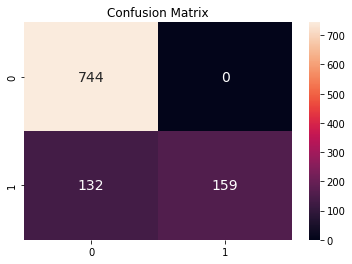

In [22]:
import seaborn as sns
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(count, labels)
predicted2 = knn.predict(Vectorizer.transform(X_test))
print(accuracy_score(y_test, predicted2))
print(classification_report(y_test, predicted2))

0.9652173913043478
              precision    recall  f1-score   support

         ham       0.96      0.99      0.98       744
        spam       0.98      0.90      0.94       291

    accuracy                           0.97      1035
   macro avg       0.97      0.94      0.96      1035
weighted avg       0.97      0.97      0.96      1035



[[738   6]
 [ 30 261]]


Text(0.5, 1.0, 'Confusion Matrix')

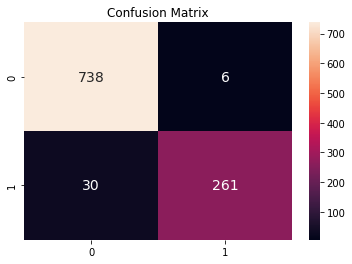

In [24]:
print(confusion_matrix(y_test, predicted2))
sns.heatmap(confusion_matrix(y_test, predicted2),annot=True,annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')

0.9632850241545894
              precision    recall  f1-score   support

         ham       0.96      0.99      0.97       744
        spam       0.98      0.88      0.93       291

    accuracy                           0.96      1035
   macro avg       0.97      0.94      0.95      1035
weighted avg       0.96      0.96      0.96      1035

[[740   4]
 [ 34 257]]


Text(0.5, 1.0, 'Confusion Matrix')

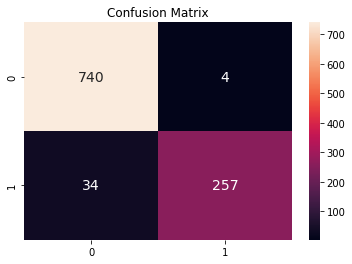

In [25]:
knn1= KNeighborsClassifier(n_neighbors=3)
knn1.fit(count, labels)
predicted21 = knn1.predict(Vectorizer.transform(X_test))
print(accuracy_score(y_test, predicted21))
print(classification_report(y_test, predicted21))
print(confusion_matrix(y_test, predicted21))
sns.heatmap(confusion_matrix(y_test, predicted21),annot=True,annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')

In [26]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1],'gamma':[0.5],'kernel':['rbf']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)
model.fit(count, labels)
y_pred_svm = model.predict(Vectorizer.transform(X_test))
accuracy = accuracy_score(y_pred_svm, y_test)
print(f"The SVM_model is {accuracy*100}% accurate")

The SVM_model is 85.60386473429952% accurate



Classification Report: 
               precision    recall  f1-score   support

         ham       0.83      1.00      0.91       744
        spam       1.00      0.49      0.66       291

    accuracy                           0.86      1035
   macro avg       0.92      0.74      0.78      1035
weighted avg       0.88      0.86      0.84      1035



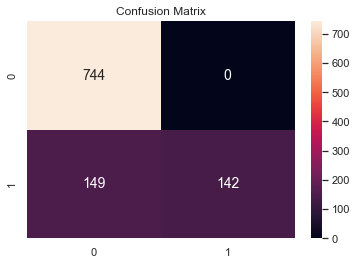

In [27]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
df_cm = pd.DataFrame(cm_svm, range(2), range(2))
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
print('\nClassification Report: \n', classification_report(y_test, y_pred_svm))

In [28]:
from sklearn.linear_model import LogisticRegression
model_logestic = LogisticRegression(solver='liblinear', random_state=0)
model_logestic.fit(count, labels)
model_logestic.predict_proba(Vectorizer.transform(X_test))


array([[0.95034026, 0.04965974],
       [0.16419679, 0.83580321],
       [0.85955252, 0.14044748],
       ...,
       [0.98674476, 0.01325524],
       [0.99252033, 0.00747967],
       [0.95208917, 0.04791083]])

In [29]:
model_logestic.predict(Vectorizer.transform(X_test))

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)


Classification Report for logestic regression model: 
               precision    recall  f1-score   support

         ham       1.00      0.98      0.99       744
        spam       0.96      0.99      0.97       291

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035



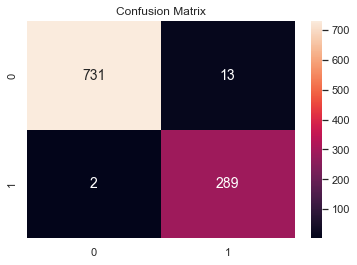

In [30]:
cm_log = confusion_matrix(y_test, model_logestic.predict(Vectorizer.transform(X_test)))
df_cm_log = pd.DataFrame(cm_log, range(2), range(2))
sns.set(font_scale=1)
sns.heatmap(df_cm_log, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
print('\nClassification Report for logestic regression model: \n', classification_report(y_test, model_logestic.predict(Vectorizer.transform(X_test))))

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(count, labels)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [32]:
clf.predict(Vectorizer.transform(X_test))

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [33]:
clf.predict(Vectorizer.transform(X_test[1:10]))

array(['spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham'],
      dtype=object)

In [34]:
score = clf.score((Vectorizer.transform(X_test)), y_test)
print(score)

0.7942028985507247


In [35]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the accuracy for each value of max_depth:
accuracy = []
print ("depth\tscore")
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(count, labels)
    score = clf.score((Vectorizer.transform(X_test)), y_test)
    print(depth,"\t",score)
    accuracy.append(score)

depth	score
1 	 0.7188405797101449
2 	 0.7942028985507247
3 	 0.7961352657004831
4 	 0.7884057971014493
5 	 0.8415458937198068


In [36]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10)
model_RandomF = RandomForestClassifier(n_estimators=100, max_features=3)
score = cross_val_score(model_RandomF, count, labels, cv=cv)
score.mean()

0.9516481267033956

In [43]:
#voting classifier about 6 min
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
cv = KFold(n_splits=10)

models = []
models.append(('xgb', XGBClassifier(n_estimators=150)))
models.append(('svc', SVC()))
models.append(('extra', ExtraTreesClassifier(n_estimators=100, max_features=3)))

model = VotingClassifier(models)
score = cross_val_score(model, count, labels, cv=cv)
score.mean()

0.985492040097788

In [44]:
#stacking classifier tooke time about 40 min !
from sklearn.ensemble import StackingClassifier
cv = KFold(n_splits=10)
models = []
models.append(('xgb', XGBClassifier(n_estimators=150)))
models.append(('svc', SVC()))
models.append(('extra', ExtraTreesClassifier(n_estimators=100, max_features=3)))
model = StackingClassifier(estimators=models, final_estimator=LogisticRegression(),cv=cv)
score = cross_val_score(model, count, labels, cv=cv)
score.mean()

0.9886344761436876